# `Predictive analytics` - Preparation

In this notebook, we will prepare our data for upcoming predictive evalualtions.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [81]:
minutely_rides = pd.read_csv("chicago_2018.csv")
minutely_rides["start_time"] = pd.to_datetime(minutely_rides["start_time"])
minutely_rides["end_time"] = pd.to_datetime(minutely_rides["end_time"])
CGO_data.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,month
3215937,2018-01-01 00:12:00,2018-01-01 00:17:23,69,159,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,3304,Subscriber,1
3215938,2018-01-01 00:41:35,2018-01-01 00:47:52,253,325,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),5367,Subscriber,1
3215939,2018-01-01 00:44:46,2018-01-01 01:33:10,98,509,LaSalle St & Washington St,Troy St & North Ave,4599,Subscriber,1
3215940,2018-01-01 00:53:10,2018-01-01 01:05:37,125,364,Rush St & Hubbard St,Larrabee St & Oak St,2302,Subscriber,1
3215941,2018-01-01 00:53:37,2018-01-01 00:56:40,129,205,Blue Island Ave & 18th St,Paulina St & 18th St,3696,Subscriber,1


In [82]:
minutely_rides["month"] = list(minutely_rides["start_time"].dt.month)
minutely_rides.sort_values(by=['start_time'], inplace = True)
minutely_rides.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,month
3215937,2018-01-01 00:12:00,2018-01-01 00:17:23,69,159,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,3304,Subscriber,1
3215938,2018-01-01 00:41:35,2018-01-01 00:47:52,253,325,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),5367,Subscriber,1
3215939,2018-01-01 00:44:46,2018-01-01 01:33:10,98,509,LaSalle St & Washington St,Troy St & North Ave,4599,Subscriber,1
3215940,2018-01-01 00:53:10,2018-01-01 01:05:37,125,364,Rush St & Hubbard St,Larrabee St & Oak St,2302,Subscriber,1
3215941,2018-01-01 00:53:37,2018-01-01 00:56:40,129,205,Blue Island Ave & 18th St,Paulina St & 18th St,3696,Subscriber,1


In [118]:
daily_rides = minutely_rides.set_index("start_time")
daily_rides = daily_rides.resample('D').count()

daily_rides.drop(columns = "start_station_id", inplace = True)
daily_rides.drop(columns = "end_station_id", inplace = True)
daily_rides.drop(columns = "start_station_name", inplace = True)
daily_rides.drop(columns = "end_station_name", inplace = True)
daily_rides.drop(columns = "bike_id", inplace = True)
daily_rides.drop(columns = "user_type", inplace = True)
daily_rides.drop(columns = "month", inplace = True)

daily_rides.rename(columns = {"end_time": "rides"}, inplace = True)

daily_rides['day'] = pd.DatetimeIndex(daily_rides.index).day

daily_rides.head(20)

,rides,day
start_time,,
2018-01-01,376,1
2018-01-02,1637,2
2018-01-03,2493,3
2018-01-04,2416,4
2018-01-05,2228,5
2018-01-06,1093,6
2018-01-07,1076,7
2018-01-08,4663,8
2018-01-09,5163,9


In [142]:
daily_rides_january = daily_rides["2018-01-01": "2018-01-31"]
daily_rides_july = daily_rides["2018-07-01" : "2018-07-31"]
daily_rides_november = daily_rides["2018-11-01" : "2018-11-30"]

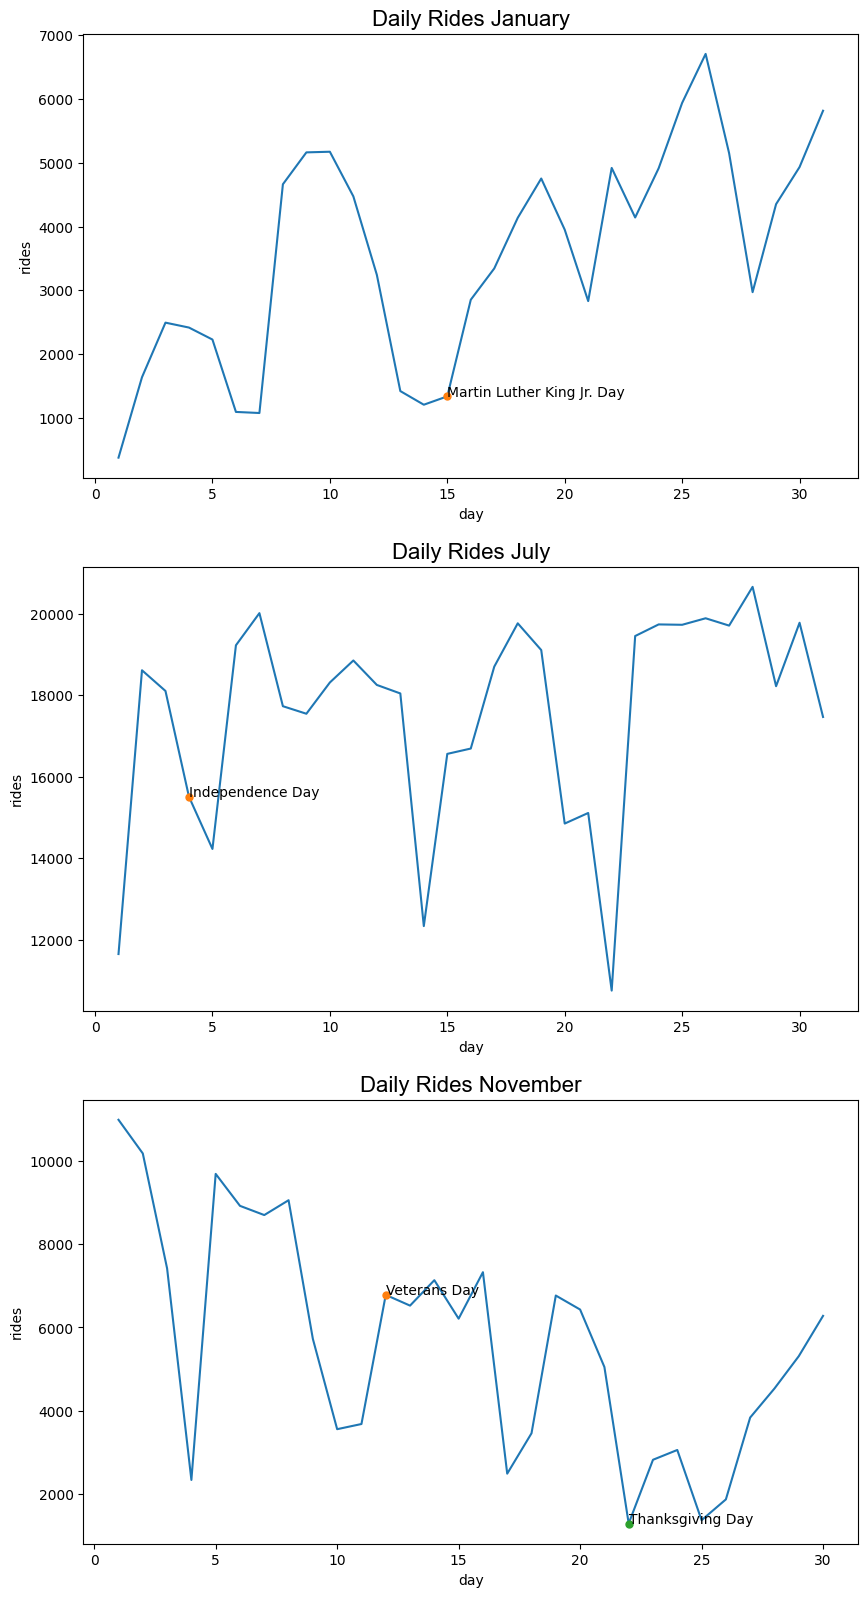

In [153]:
fig,ax = plt.subplots(3, 1, figsize=(10,20), dpi = 100)

x1 = daily_rides_january["day"]
x2 = daily_rides_july["day"]
x3 = daily_rides_november["day"]
y1 = daily_rides_january["rides"]
y2 = daily_rides_july["rides"]
y3 = daily_rides_november["rides"]


ax[0].plot(x1,y1)
ax[0].plot(15,daily_rides_january["rides"][daily_rides_january["day"] == 15],'o', markersize=5)
ax[0].annotate("Martin Luther King Jr. Day", (15,daily_rides_january["rides"][daily_rides_january["day"] == 15] ))
ax[0].set_xlabel('day')
ax[0].set_ylabel('rides')
ax[0].set_title("Daily Rides January", fontsize=16, fontname="Arial")

ax[1].plot(x2,y2)
ax[1].plot(4,daily_rides_july["rides"][daily_rides_july["day"] == 4],'o', markersize=5)
ax[1].annotate("Independence Day", (4,daily_rides_july["rides"][daily_rides_july["day"] == 4] ))
ax[1].set_xlabel('day')
ax[1].set_ylabel('rides')
ax[1].set_title("Daily Rides July", fontsize=16, fontname="Arial")

ax[2].plot(x3,y3)
ax[2].plot(12,daily_rides_november["rides"][daily_rides_november["day"] == 12],'o', markersize=5)
ax[2].annotate("Veterans Day", (12,daily_rides_november["rides"][daily_rides_november["day"] == 12] ))
ax[2].plot(22,daily_rides_november["rides"][daily_rides_november["day"] == 22],'o', markersize=5)
ax[2].annotate("Thanksgiving Day", (22,daily_rides_november["rides"][daily_rides_november["day"] == 22] ))
ax[2].set_xlabel('day')
ax[2].set_ylabel('rides')
ax[2].set_title("Daily Rides November", fontsize=16, fontname="Arial")



plt.show()